# Do Timestamps Match up?

In [1]:
import imp
import run_analysis as ana
from ximea import xiapi
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

import ximea_cam_aquire_save as xim

from time import sleep, time
import pupil_cam_aquire_save as pup
import zmq_socket as zmqs
import pupil.pupil_src.shared_modules.file_methods as pupfm
import threading

## Collect some Images from Eyetracker & Ximea Cameras

***Dont Actually Do this unless you want to spend a bunch of time to go through and find the blinking on and off**

Collect with all 4 cameras (2 ximea, 2 pupil labs) facing a strobing light to determine if on/off times are matched.

In [2]:
collection_mins = 0.5
save_batchsize = 200
pupil_port = 42715

pupil_save_dir_name = '/home/vasha/code/backpack_computer_aquisition/test_timestamps/pupil'
ximea_save_folder_list = ['./test_timestamps', '/tb_disk/test_timestamps']

#Don't actually recapture
recapture=False

In [3]:
if(recapture):
    #start pupil labs aquisition as a spun off thread
    eyetracker_thread = threading.Thread(target=pup.run_pupillabs_aquisition, 
                                            args=(pupil_save_dir_name,
                                                 collection_mins,
                                                 pupil_port))
    eyetracker_thread.daemon = True  # Daemonize thread
    eyetracker_thread.start()        # Start the execution   

    #run ximea acquision realtime.
    xim.ximea_acquire(ximea_save_folder_list, max_collection_mins=collection_mins, ims_per_file=save_batchsize)
else:
    print("Not Actually Recapturing. Assume we already have data")

Not Actually Recapturing. Assume we already have data


## Paths for Timestamps Files

In [14]:
od_ximea_timestamp_path = os.path.join(ximea_save_folder_list[0],'timestamps_od.tsv')
cy_ximea_timestamp_path = os.path.join(ximea_save_folder_list[1],'timestamps_cy.tsv')

od_pupil_timestamp_path = os.path.join(pupil_save_dir_name,'002','eye0_timestamps.npy')
os_pupil_timestamp_path = os.path.join(pupil_save_dir_name,'002','eye1_timestamps.npy')


## Find Image of Two Ximea Cameras near Turn-on Point

In [5]:
imp.reload(ana)
target_timestamp = 5827.39

frame_od, ts_od = ana.ximea_timestamp_to_framenum(od_timestamp_path, target_timestamp)
frame_cy, ts_cy = ana.ximea_timestamp_to_framenum(cy_timestamp_path, target_timestamp)
#ts_cy = ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy) #reverse

img_od = ana.ximea_get_frame(frame_od, save_batchsize, 'od', ximea_save_folder_list[0])
img_cy = ana.ximea_get_frame(frame_cy, save_batchsize, 'cy', ximea_save_folder_list[1])

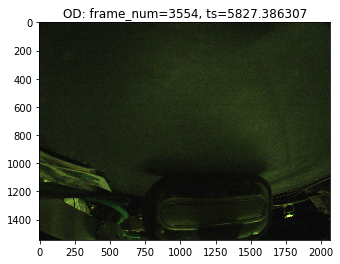

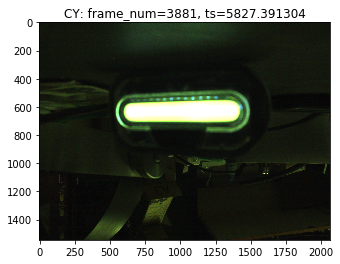

In [6]:
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od}, ts={ts_od}')
plt.show()
plt.imshow(img_cy)
plt.title(f'CY: frame_num={frame_cy}, ts={ts_cy}')
plt.show()

## Turn On - OD

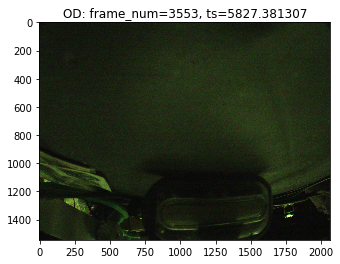

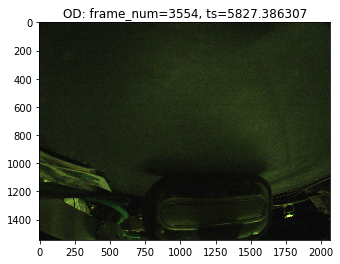

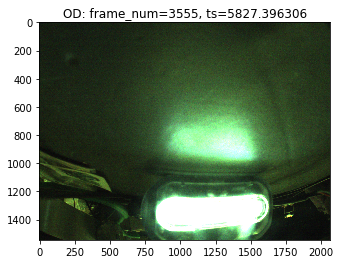

In [7]:
imp.reload(ana)
img_od = ana.ximea_get_frame(frame_od-1, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od-1}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od-1)}')
plt.show()

img_od = ana.ximea_get_frame(frame_od, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od)}')
plt.show()

img_od = ana.ximea_get_frame(frame_od+1, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od+1}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od+1)}')
plt.show()

## Turn On - OS

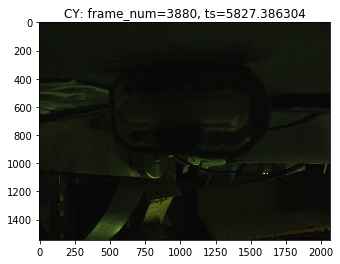

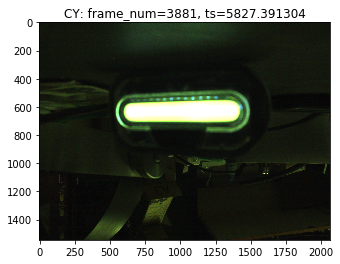

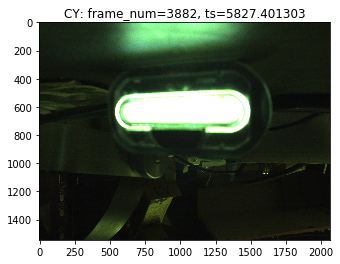

In [8]:
imp.reload(ana)
img_od = ana.ximea_get_frame(frame_cy-1, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy-1}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy-1)}')
plt.show()

img_od = ana.ximea_get_frame(frame_cy, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy)}')
plt.show()

img_od = ana.ximea_get_frame(frame_cy+1, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy+1}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy+1)}')
plt.show()

## Find Image of Two Ximea Cameras near Turn-off Point

In [9]:
imp.reload(ana)
target_timestamp = 5837.48

frame_od, ts_od = ana.ximea_timestamp_to_framenum(od_timestamp_path, target_timestamp)
frame_cy, ts_cy = ana.ximea_timestamp_to_framenum(cy_timestamp_path, target_timestamp)
#ts_cy = ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy) #reverse

img_od = ana.ximea_get_frame(frame_od, save_batchsize, 'od', ximea_save_folder_list[0])
img_cy = ana.ximea_get_frame(frame_cy, save_batchsize, 'cy', ximea_save_folder_list[1])

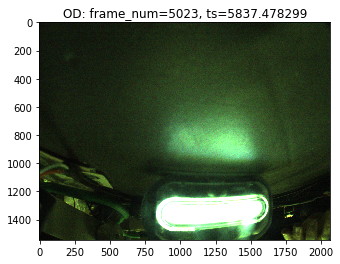

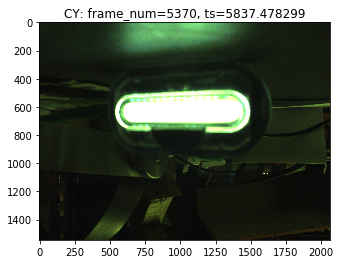

In [10]:
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od}, ts={ts_od}')
plt.show()
plt.imshow(img_cy)
plt.title(f'CY: frame_num={frame_cy}, ts={ts_cy}')
plt.show()

## Turn Off - OD

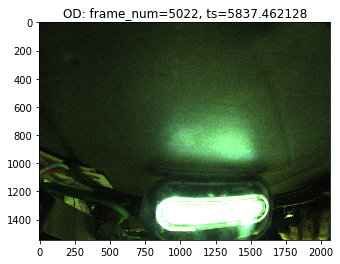

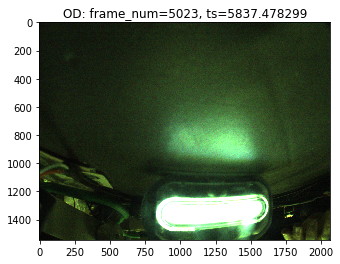

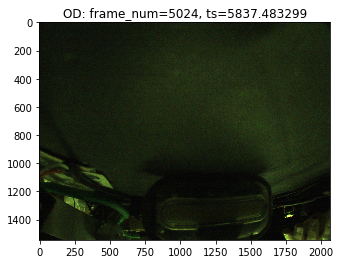

In [11]:
imp.reload(ana)
img_od = ana.ximea_get_frame(frame_od-1, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od-1}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od-1)}')
plt.show()

img_od = ana.ximea_get_frame(frame_od, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od)}')
plt.show()

img_od = ana.ximea_get_frame(frame_od+1, save_batchsize, 'od', ximea_save_folder_list[0])
plt.imshow(img_od)
plt.title(f'OD: frame_num={frame_od+1}, ts={ana.ximea_framenum_to_timestamp(od_timestamp_path, frame_od+1)}')
plt.show()

## Turn Off - CY

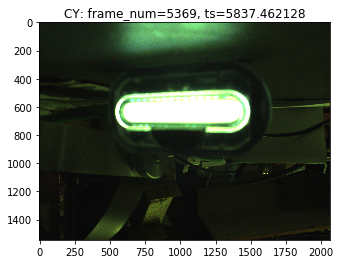

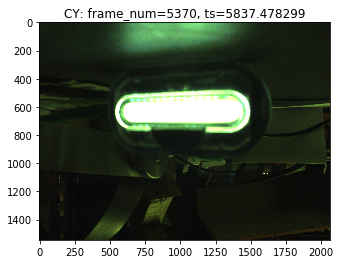

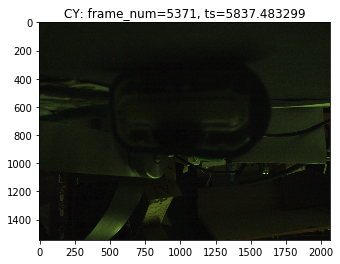

In [12]:
imp.reload(ana)
img_od = ana.ximea_get_frame(frame_cy-1, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy-1}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy-1)}')
plt.show()

img_od = ana.ximea_get_frame(frame_cy, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy)}')
plt.show()

img_od = ana.ximea_get_frame(frame_cy+1, save_batchsize, 'cy', ximea_save_folder_list[1])
plt.imshow(img_od)
plt.title(f'CY: frame_num={frame_cy+1}, ts={ana.ximea_framenum_to_timestamp(cy_timestamp_path, frame_cy+1)}')
plt.show()

## Turn Off - Pupil Labs Eye 1

The light turns off between:   
OD: 5837.478 and 5837.483   
CY: 5837.478 and 5837.483   

Timestamps are syncing up - this seems a bit unexpected. Checking manually it looks like the only happens some of the time. I wonder if it may have something to do with the bandwidth being limited.  

In [13]:
def pupil_framenum_to_timestamp(timestamp_file, framenum):
    '''
    Given a unix timestamp, what is the closest frame from a pupil camera recording?
    Params:
        timestamp_file (str): path to a timestamp file for this camera
        framenum (int): framenum desired
    Returns:
        ts (float): timestamp of framenum frame
    '''
    timestamp_list = np.load(timestamp_file)
    ts = timestamp_list[framenum]
    return(ts)

def pupil_timestamp_to_framenum(timestamp_file, timestamp):
    '''
    Given a unix timestamp, what is the closest frame from a pupil camera recording?
    Params:
        timestamp_file (str): path to a timestamp file for this camera
        timestamp (float): timestamp desired.
    Returns:
        i (int): frame number of collection *NOT NFRAME CAMERA COUNTER*) closest to timestamp
        true_timestamp (float): What is the real timestamp of this frame?
    '''
    timestamp_list = np.load(timestamp_file)
    i = np.argmin(np.abs(timestamp_list-timestamp))
    true_timestamp = timestamp_list[i]

    return(i, true_timestamp)


In [15]:
pupil_timestamp_to_framenum(od_pupil_timestamp_path, target_timestamp)

(0, 1572479370.7539046)

In [16]:
ts = np.load(od_pupil_timestamp_path)

In [17]:
ts.shape

(5970,)

In [18]:
ts[:10]

array([1.57247937e+09, 1.57247937e+09, 1.57247937e+09, 1.57247937e+09,
       1.57247937e+09, 1.57247937e+09, 1.57247937e+09, 1.57247937e+09,
       1.57247937e+09, 1.57247937e+09])